In [44]:
# basically this means `import note_evaluation_helper`
%run 'note_evaluation_helper.ipynb'

# Regression model for note splitting

In [45]:
import numpy as np
import soundfile as sf
import statsmodels.api as sm
import pandas as pd

In [46]:
def lg_regression(signal_to_ayse):

#     filename = 'C4_61_64_67_71.wav'

    #number of keys (should be 12) to be considered here
    num_notes = 12

    #level of significance
    alpha = 0.00001

    # assuming that we have 12 vectors of length 4096: A,A_sharp,B.......G_sharp
    #these are the fourier transforms of the notes
    # then we can make a matrix X, with the columns as these notes

    #X is a 2048 by 12 matrix
    X = np.zeros((2048,num_notes))


    #reading the sound file

    for i in range(12):
        ref, sample_rate = sf.read('soundfile_template/C4_' + str(i+60) +'_x_x_x.wav')
        note = np.fft.fft(ref[20000:24096,0]) 
        note_new = note.real[0:int(len(note)/2)]
        X[:,i] = note_new
    


    note = np.fft.fft(signal_to_ayse)
    note_new = note.real[0:int(len(note)/2)]
    Y = note_new
    print(Y)


    # define the predictors and target values in data frames
    x = pd.DataFrame(X)
    y = pd.DataFrame(Y)

    # Note the difference in argument order
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) # make the predictions by the model

    # Print out the statistics
    print(model.summary())
    
    print("r-squared value: ", model.rsquared)

    involved_notes = []
    for i in range(len(model.pvalues)):
        if model.pvalues[i] < alpha:
            involved_notes.append(i+60)

    print(involved_notes)
#     print("mystery chord is", filename)
    print("degree of significance, alpha is:", alpha)
    
    return involved_notes


C4_63_68_x_x


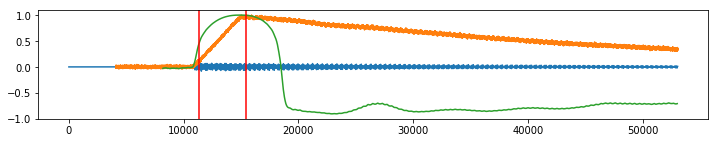

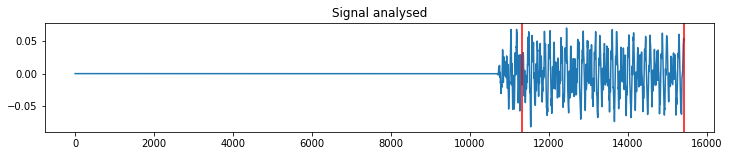

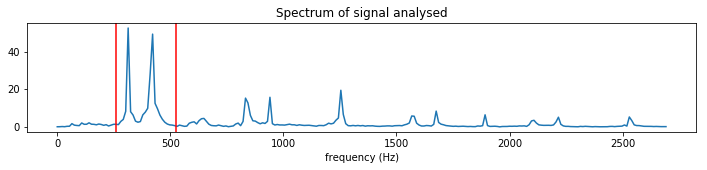

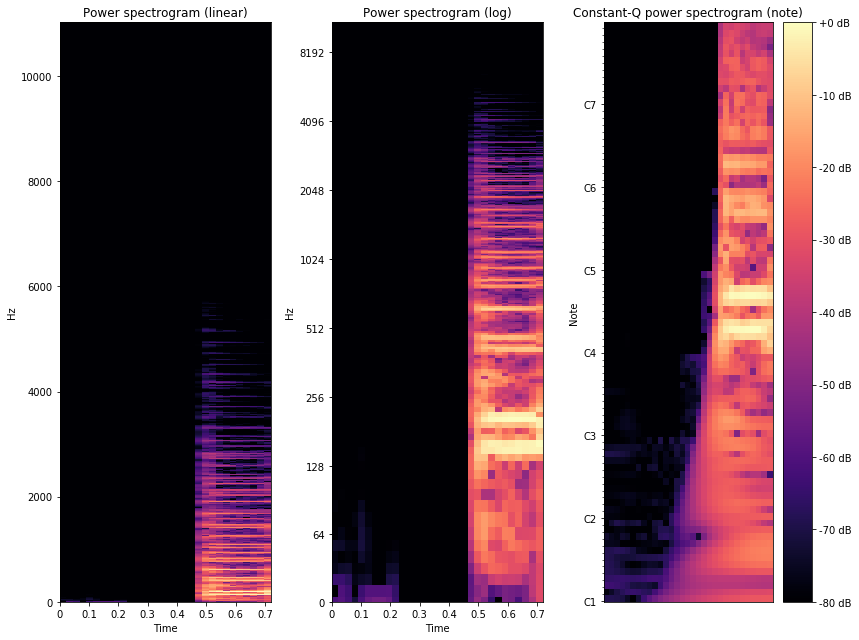

[-0.06045532  0.03872441  0.04158559 ... -0.03066161 -0.03104714
 -0.03069488]
                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     68.51
Date:                Sat, 12 May 2018   Prob (F-statistic):          2.08e-140
Time:                        22:28:33   Log-Likelihood:                -3356.7
No. Observations:                2048   AIC:                             6737.
Df Residuals:                    2036   BIC:                             6805.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

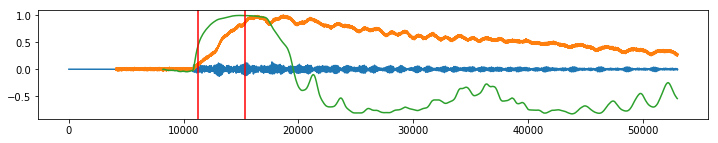

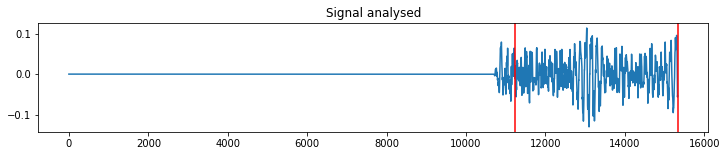

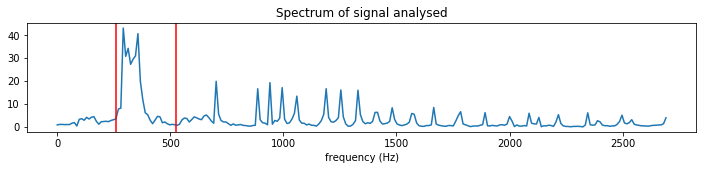

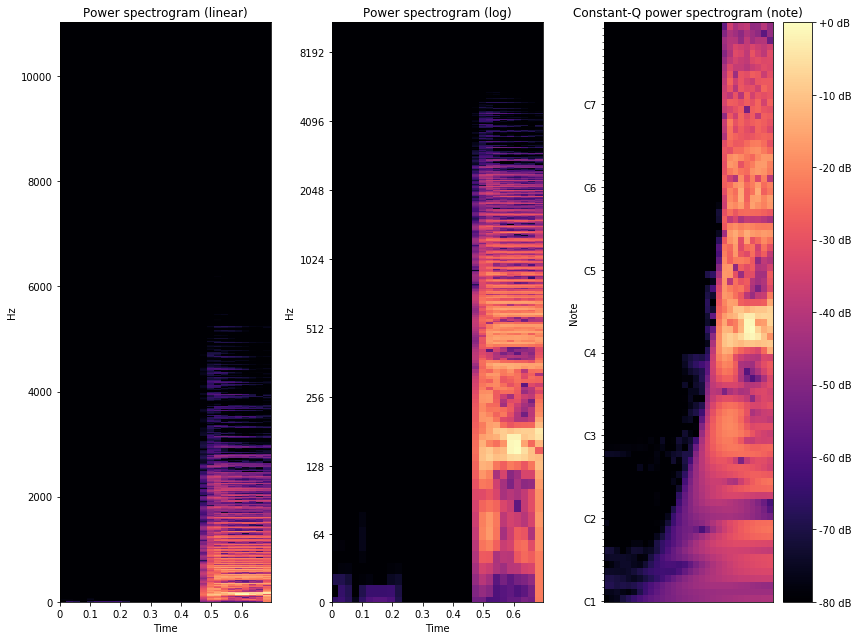

[0.93258667 1.13602868 1.1244707  ... 0.02236536 0.02206432 0.02185089]
                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     200.4
Date:                Sat, 12 May 2018   Prob (F-statistic):               0.00
Time:                        22:28:38   Log-Likelihood:                -3290.5
No. Observations:                2048   AIC:                             6605.
Df Residuals:                    2036   BIC:                             6673.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

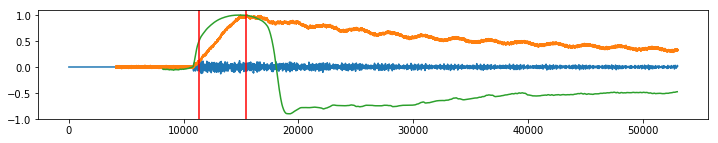

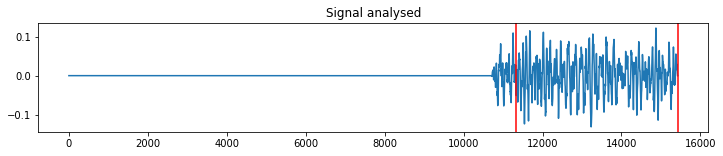

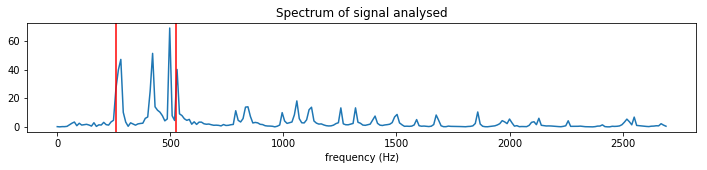

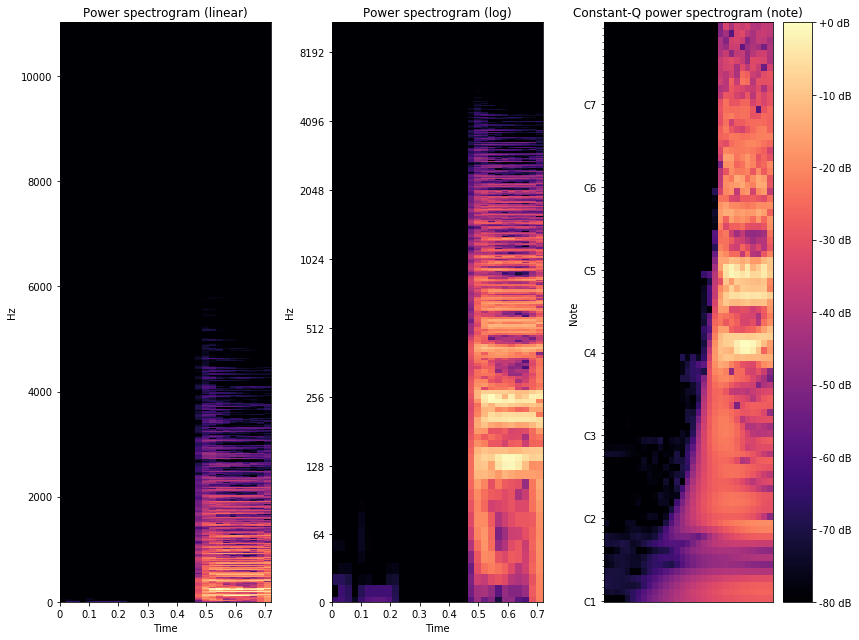

[-0.20504761 -0.06468374 -0.14487454 ... -0.01389888 -0.01395637
 -0.01377021]
                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     389.4
Date:                Sat, 12 May 2018   Prob (F-statistic):               0.00
Time:                        22:28:44   Log-Likelihood:                -3065.8
No. Observations:                2048   AIC:                             6156.
Df Residuals:                    2036   BIC:                             6223.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

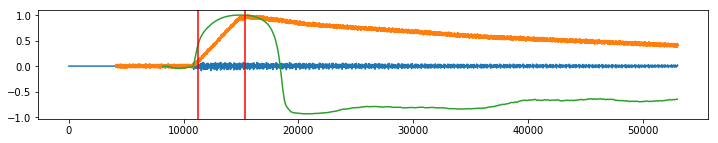

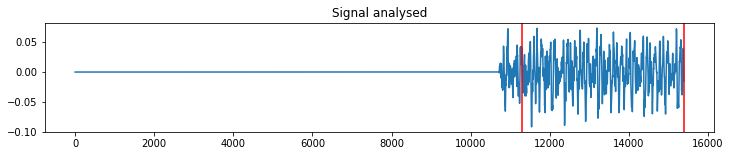

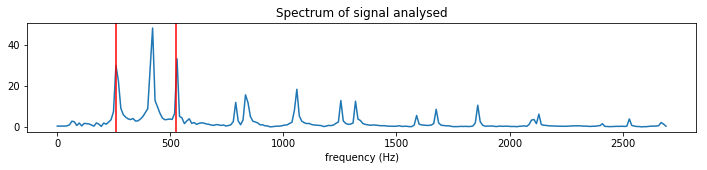

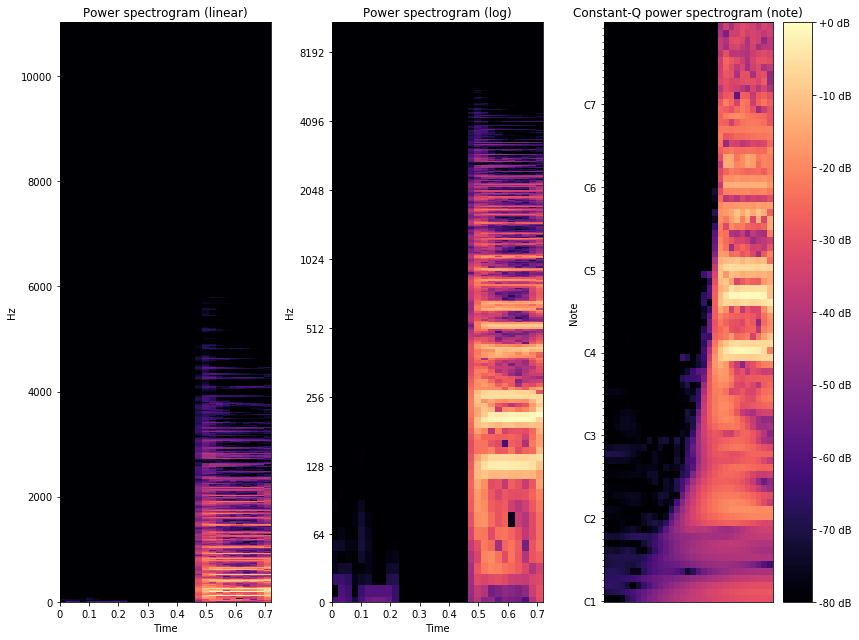

[-0.41174316 -0.39075277 -0.42142854 ...  0.02721445  0.02723362
  0.02724131]
                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     138.4
Date:                Sat, 12 May 2018   Prob (F-statistic):          3.61e-253
Time:                        22:28:49   Log-Likelihood:                -3059.9
No. Observations:                2048   AIC:                             6144.
Df Residuals:                    2036   BIC:                             6211.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

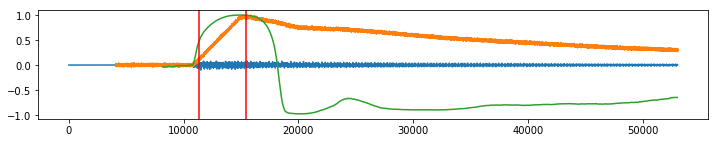

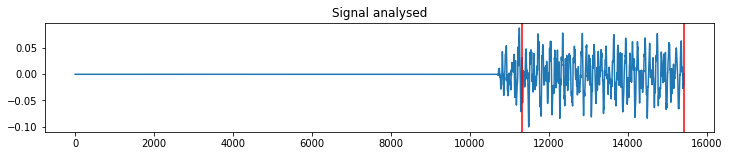

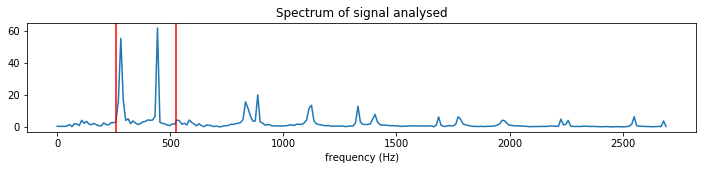

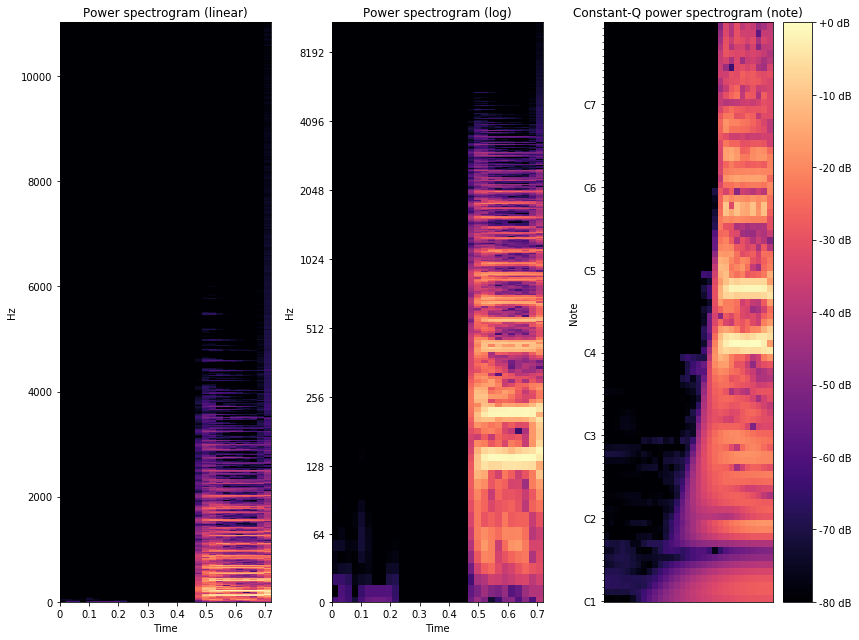

[-0.46627808 -0.31203674 -0.30842095 ...  0.00508222  0.00476155
  0.00507116]
                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     780.2
Date:                Sat, 12 May 2018   Prob (F-statistic):               0.00
Time:                        22:28:54   Log-Likelihood:                -2204.9
No. Observations:                2048   AIC:                             4434.
Df Residuals:                    2036   BIC:                             4501.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

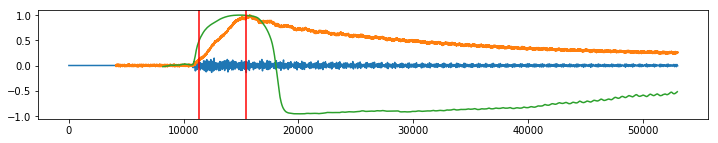

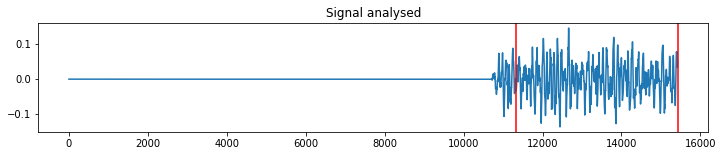

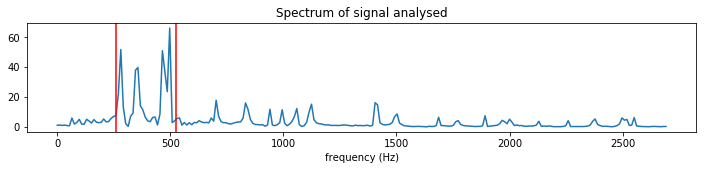

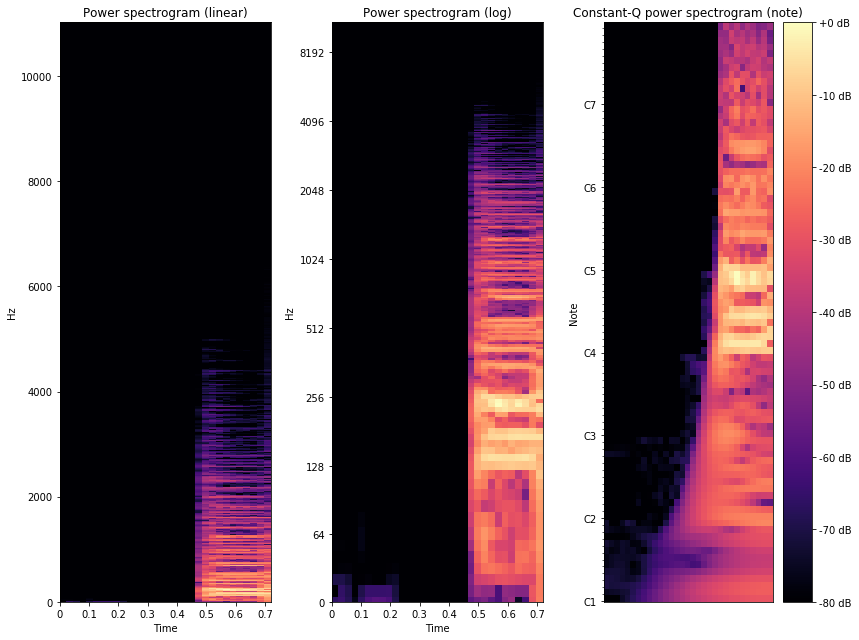

[ 1.10934448  1.31246425  1.02218789 ... -0.0417299  -0.04196409
 -0.04235986]
                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     731.5
Date:                Sat, 12 May 2018   Prob (F-statistic):               0.00
Time:                        22:28:59   Log-Likelihood:                -2946.5
No. Observations:                2048   AIC:                             5917.
Df Residuals:                    2036   BIC:                             5985.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

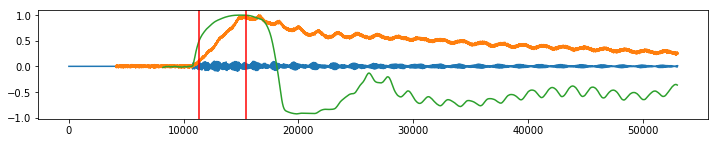

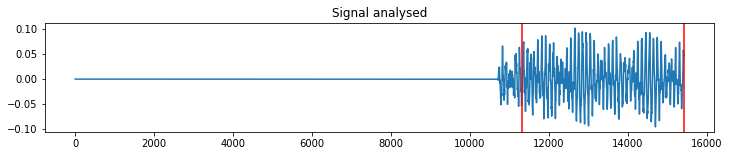

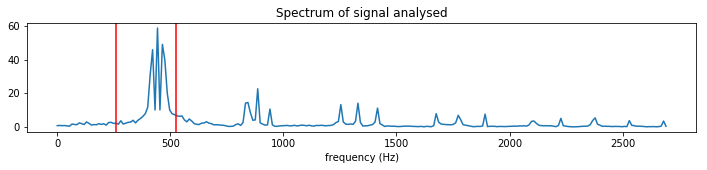

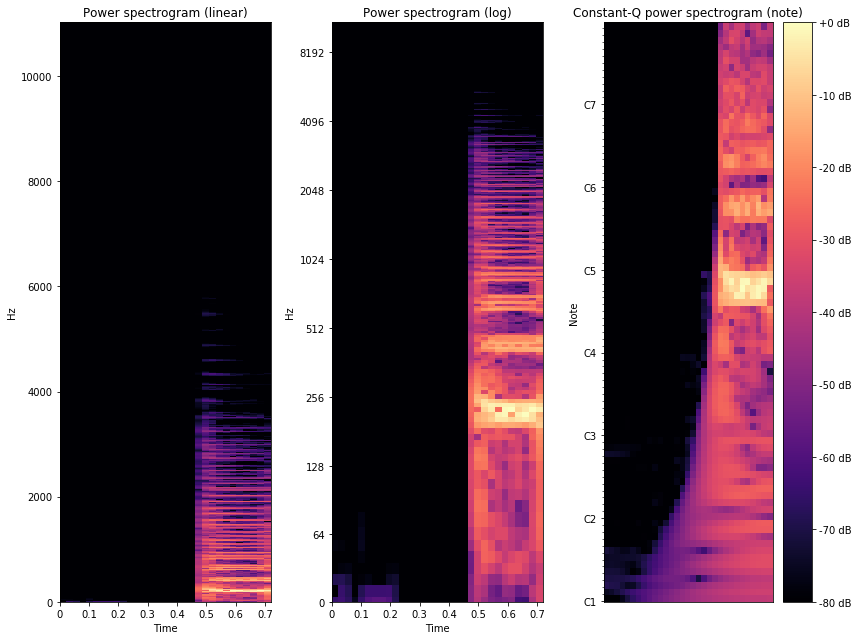

[ 0.75460815  0.86714509  0.70482973 ... -0.03482367 -0.03525991
 -0.03536847]
                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1122.
Date:                Sat, 12 May 2018   Prob (F-statistic):               0.00
Time:                        22:29:05   Log-Likelihood:                -2167.9
No. Observations:                2048   AIC:                             4360.
Df Residuals:                    2036   BIC:                             4427.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

KeyboardInterrupt: 

In [47]:
if __name__ == '__main__':
    test_function_accuracy(lg_regression, plotting=True, deleting=True)